# Analysis of Meteorological Data

### Import The Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print ("Module are imported")

Module are imported


### Importing Dataset

In [2]:
meteorological_data = pd.read_csv("Dataset/weatherHistory.csv")
meteorological_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


### Data Cleaning

In [3]:
df = meteorological_data[["Formatted Date", "Apparent Temperature (C)", "Humidity"]]
df.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


In [4]:
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], utc=True)
df.head()

C:\Users\UsEr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Formatted Date,Apparent Temperature (C),Humidity
0,2006-03-31 22:00:00+00:00,7.388889,0.89
1,2006-03-31 23:00:00+00:00,7.227778,0.86
2,2006-04-01 00:00:00+00:00,9.377778,0.89
3,2006-04-01 01:00:00+00:00,5.944444,0.83
4,2006-04-01 02:00:00+00:00,6.977778,0.83


In [5]:
df.dtypes

Formatted Date              datetime64[ns, UTC]
Apparent Temperature (C)                float64
Humidity                                float64
dtype: object

In [6]:
df = df.set_index("Formatted Date")
df.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-03-31 22:00:00+00:00,7.388889,0.89
2006-03-31 23:00:00+00:00,7.227778,0.86
2006-04-01 00:00:00+00:00,9.377778,0.89
2006-04-01 01:00:00+00:00,5.944444,0.83
2006-04-01 02:00:00+00:00,6.977778,0.83


In [7]:
dfinal = df[["Apparent Temperature (C)", "Humidity"]].resample("M").mean()
dfinal.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


### Visulization of Data

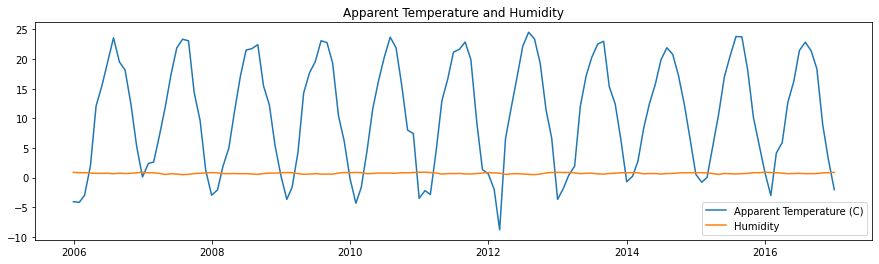

In [8]:
plt.figure(figsize=(15,4))
plt.title("Apparent Temperature and Humidity")
plt.plot(dfinal["Apparent Temperature (C)"],label = "Apparent Temperature (C)")
plt.plot(dfinal["Humidity"], label = "Humidity")
plt.legend()

### Data From April 2006 to April 2016

In [9]:
df_april = dfinal[dfinal.index.month==4]
df_april

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-04-30 00:00:00+00:00,12.098827,0.728625
2007-04-30 00:00:00+00:00,11.894421,0.536361
2008-04-30 00:00:00+00:00,11.183688,0.693194
2009-04-30 00:00:00+00:00,14.267076,0.567847
2010-04-30 00:00:00+00:00,11.639406,0.706875
2011-04-30 00:00:00+00:00,12.978997,0.591625
2012-04-30 00:00:00+00:00,11.782770,0.650222
2013-04-30 00:00:00+00:00,12.045563,0.677667
2014-04-30 00:00:00+00:00,12.486181,0.691403


In [10]:
df_april.describe()

,Apparent Temperature (C),Humidity
count,11.000000,11.000000
mean,12.158287,0.641051
std,0.965900,0.068193
min,10.632801,0.536361
25%,11.711088,0.579736
50%,12.045563,0.659972
75%,12.608804,0.692299
max,14.267076,0.728625


### Data Visulization for 10 Years on April 2006 to 2016

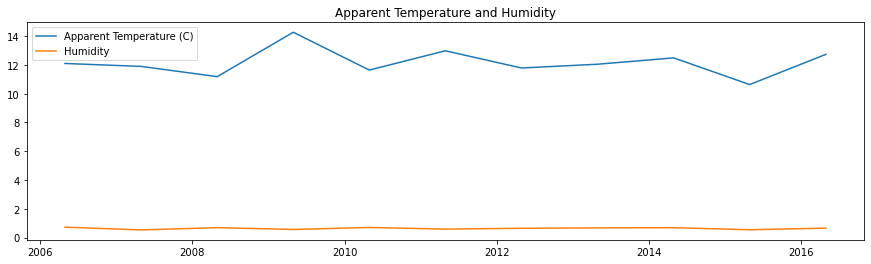

In [11]:
plt.figure(figsize=(15,4))
plt.title("Apparent Temperature and Humidity")
plt.plot(df_april["Apparent Temperature (C)"],label = "Apparent Temperature (C)")
plt.plot(df_april["Humidity"], label = "Humidity")
plt.legend()